# Erdős-Rényi random graph evolution

<b> Click on the title and rename the file  with your name! </b>

In this homework you will implement the Erdős-Rényi random graph evolution. For a given n the function will output the phase transition values of the following properties: the graph has minimum degree 1, the graph becomes connected, the graph has a perfect matching or if n is odd a matching covering all but one vertex, the graph has minimum degree 2, the graph has a Hamiltonian cycle.

In [1]:
import numpy as np
from ipywidgets import interact #check out this tool!
import ipywidgets as widgets

# Idea

In [2]:
def ErdosRenyiEvolution(n, cut_off=None, graphics=False):
    """For a given n it creates an Erdős-Rényi random graph evolution on n vertices and it outputs the threshold value of 
    the following five properties:  the graph has minimum degree 1, the graph becomes connected, the graph has a perfect 
    matching  or if n is odd a matching covering all but one vertex, the graph has minimum degree 2, the graph has a 
    Hamiltonian cycle. Furthermore, if graphics=True, then it provides a visual representation of the evolution by a 
    slider (using interact) on 101 pictures for probability values p=0,0.01,...,0.99,1."""
    
    # TODO 
    # Note that computing (near) perfect mathcings and especially computing Hamiltonian cycles are  bit harder than 
    # the other tasks, so you don't want to run these things too many times. If you organize your code carefully, then
    # you can save a lot of time.
    
    # First create the pictures and only after that output them. Don't try making difficult computations 
    # why you plot pictures.
    
    # When you choose the vertex sizes, try to scale them so that they do not look ugly if you choose a large n.
    
    allow_loops = False
    #########################################
    # generate cut-off points
    P = np.linspace(start=0, stop=1, num=100)
    # generate a random n x n matrix
    adj = np.random.random((n, n))
    # make it a symmetric matrix
    adj = (adj + adj.T)/2
    # list for storing the results of the evolution
    graphs = []
    for p in P:
        # create an adjacency matrix
        a = np.where(adj<=p, 1, 0)
        if not allow_loops:
            # clear diagonal to disallow loops
            np.fill_diagonal(a, 0)
        # store evolution step
        graphs.append(Graph(matrix(a)))

    # minimum degree threshold
    min_degrees = np.array([g.degree_sequence()[-1] for g in graphs])
    min_degree_1_threshold = np.argmax(min_degrees>0)
    min_degree_2_threshold = np.argmax(min_degrees>1)

    # connectedness threshold
    connectedness = np.array([g.is_connected() for g in graphs])
    connectedness_threshold = np.argmax(connectedness==True)

    # (nearly) perfect matching threshold
    tolerance = n%2 # for odd edges allow 1 otherwise 0
    for i, g in enumerate(graphs):
        matching = len(g.matching())
        diff = round(g.order()/2)-matching
        if diff <= tolerance:
            perfect_matching_threshold = i
            break

    # Hamiltonian cycle threshold
    for i, g in enumerate(graphs):
        cycle = g.cycle_basis()
        if len(cycle) > 0:
            cycle = len(set(np.hstack(g.cycle_basis())))
            # compare the number of unique vertices in the cycle basis to the number of edges
            if cycle == n:
                hamiltonian_cycle_threshold = i
                break
    
    
    print("The minimum degree 1 threshold is:", min_degree_1_threshold)
    print("The connectedness threshold is:", connectedness_threshold)
    print("The perfect matching threshold is:", perfect_matching_threshold)
    print("The minimum degree 2 threshold is:", min_degree_2_threshold)
    print("The hamiltonian cycle threshold is:", hamiltonian_cycle_threshold)
    
    if graphics:
        show([g.plot() for g in graphs][int(cut_off*100)])
    
    return (min_degree_1_threshold,
            connectedness_threshold,
            perfect_matching_threshold,
            min_degree_2_threshold,
            hamiltonian_cycle_threshold)

# Idea

The idea was to grasp the problem using a random symmetric matrix, then by the fixed $p$ we get an adjacency matrix, which we can use to build the graph. With this approach there may be loops so we need fill the diagonal with zeros in the end in order to avoid loops.

In [3]:
def ErdosRenyiRandomGraph(n, p, allow_loops=False):
    adj = np.where(np.random.random((n, n))<=p, 1, 0)
    adj = (adj + adj.T) / 2
    if not allow_loops:
        np.fill_diagonal(adj, 0)
    return Graph(matrix(adj), format='adjacency_matrix')

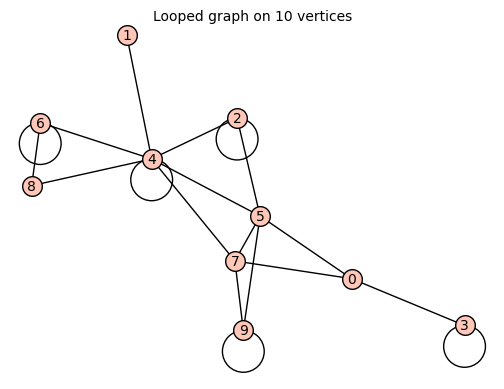

In [4]:
ErdosRenyiRandomGraph(n=10, p=0.2, allow_loops=True)

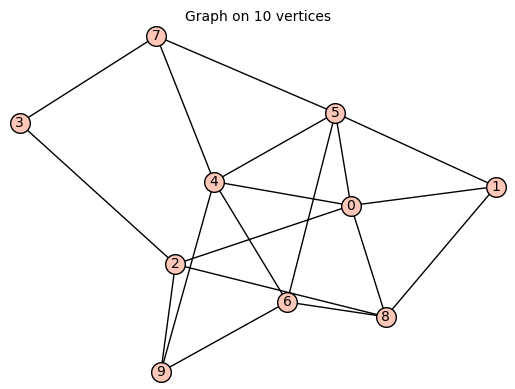

In [5]:
ErdosRenyiRandomGraph(n=10, p=0.2, allow_loops=False)

# Example

Minimum degree 1-degree threshold:


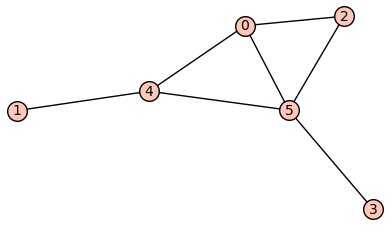

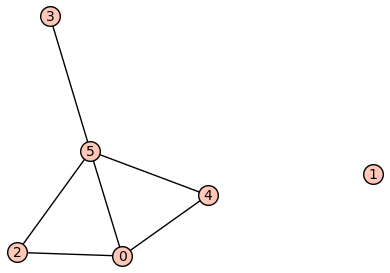

Minimum degree 2-degree threshold:


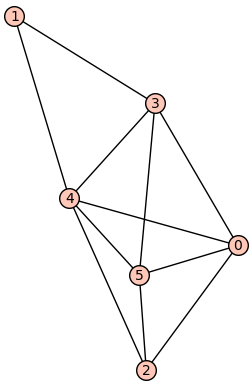

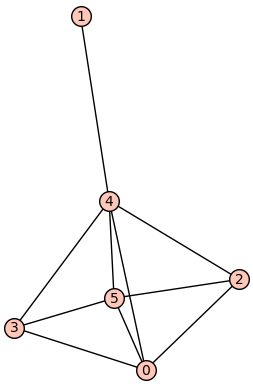

Connectedness threshold:


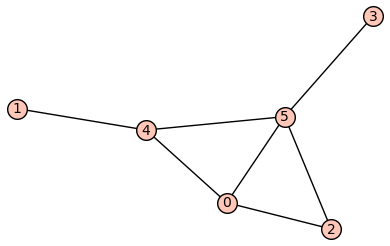

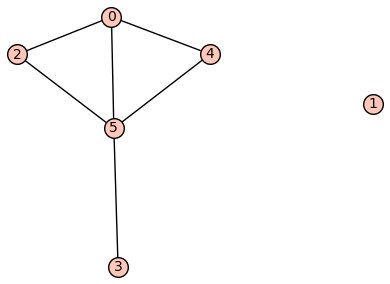

Matching threshold:


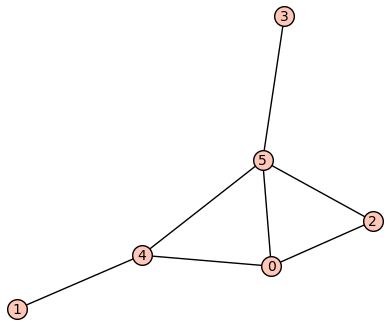

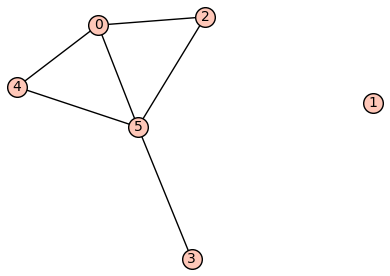

Hamiltonian cycle threshold:


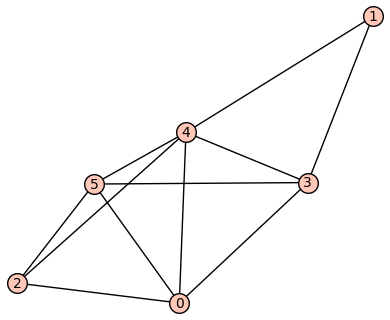

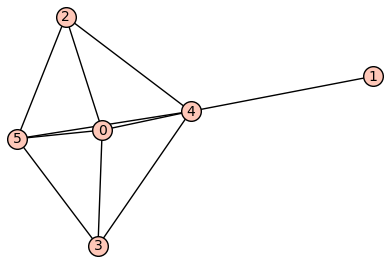

In [6]:
n = 6

#########################################
allow_loops = False
# generate cut-off points
P = np.linspace(start=0, stop=1, num=100)
# generate a random n x n matrix
adj = np.random.random((n, n))
# make it a symmetric matrix
adj = (adj + adj.T)/2
# list for storing the results of the evolution
graphs = []
for p in P:
    # create an adjacency matrix
    a = np.where(adj<=p, 1, 0)
    if not allow_loops:
        # clear diagonal to disallow loops
        np.fill_diagonal(a, 0)
    # store evolution step
    graphs.append(Graph(matrix(a)))
    
# minimum degree threshold
min_degrees = np.array([g.degree_sequence()[-1] for g in graphs])
min_degree_1_threshold = np.argmax(min_degrees>0)
min_degree_2_threshold = np.argmax(min_degrees>1)

# connectedness threshold
connectedness = np.array([g.is_connected() for g in graphs])
connectedness_threshold = np.argmax(connectedness==True)

# (nearly) perfect matching threshold
tolerance = n%2 # for odd edges allow 1 otherwise 0
for i, g in enumerate(graphs):
    matching = len(g.matching())
    diff = round(g.order()/2)-matching
    if diff <= tolerance:
        perfect_matching_threshold = i
        break

# Hamiltonian cycle threshold
for i, g in enumerate(graphs):
    cycle = g.cycle_basis()
    if len(cycle) > 0:
        cycle = len(set(np.hstack(g.cycle_basis())))
        # compare the number of unique vertices in the cycle basis to the number of edges
        if cycle == n:
            hamiltonian_cycle_threshold = i
            break
            
print('Minimum degree 1-degree threshold:')
graphs[min_degree_1_threshold].show()
graphs[min_degree_1_threshold-1].show()

print('Minimum degree 2-degree threshold:')
graphs[min_degree_2_threshold].show()
graphs[min_degree_2_threshold-1].show()

print('Connectedness threshold:')
graphs[connectedness_threshold].show()
graphs[connectedness_threshold-1].show()

print('Matching threshold:')
graphs[perfect_matching_threshold].show()
graphs[perfect_matching_threshold-1].show()

print('Hamiltonian cycle threshold:')
graphs[hamiltonian_cycle_threshold].show()
graphs[hamiltonian_cycle_threshold-1].show()

# Measurements

In [7]:
ErdosRenyiEvolution(100, graphics=False) #run these things several times.

The minimum degree 1 threshold is: 17
The connectedness threshold is: 17
The perfect matching threshold is: 17
The minimum degree 2 threshold is: 17
The hamiltonian cycle threshold is: 17


(17, 17, 17, 17, 17)

The minimum degree 1 threshold is: 25
The connectedness threshold is: 25
The perfect matching threshold is: 25
The minimum degree 2 threshold is: 30
The hamiltonian cycle threshold is: 30


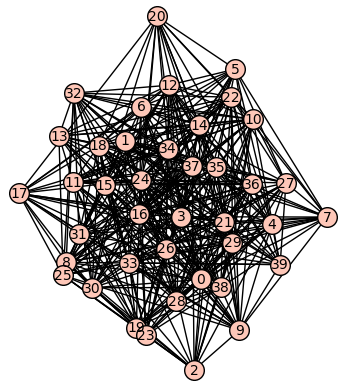

(25, 25, 25, 30, 30)

In [8]:
ErdosRenyiEvolution(40, cut_off=0.5, graphics=True) #run these things at least a few times.

What kind of observation do you have about the threshold numbers? Do you have an intuition why it happens?

When $n$ is higher the thresholds are usually reached faster.

In [9]:
interact(ErdosRenyiEvolution,
         n=widgets.IntText(value=10, description='n', disabled=False),
         cut_off=widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.01),
         graphics=widgets.Checkbox(value=False, description='Graphics', disabled=False, indent=True))

interactive(children=(IntText(value=10, description='n'), FloatSlider(value=0.01, description='cut_off', max=1…

<function ErdosRenyiEvolution at 0x6ffed7bf85f0>

In [10]:
@interact(p=(0.0,1.0,0.01))
def plot(p):
    return [g.plot() for g in graphs][int(p*100)]

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…